# Drug Testing Trial (Bayes Therom)

These are my notes from the series of lecture videos on Bayes Therom (the Drug Testing Trial)

## Bayes Therom

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$



# Problem Statement

* A drug test where the probability of a non-user testing positive is 0.99 and the probability of a user testing negative is 0.99
* If someone tests positive, whats the probability of them being a user
* Need to know what percentage of poplation are drug users - this can be got in real life using surveys etc. but for this simulation we'll sat 0.5% (or 5 in 1000)

## Events, Outcomes, Probability (some terminology)

![cards](img/cards.jpg)

* A probability is a number between zero and one inclusive,$$ P  \epsilon (0,1)$$
* Start with a *set of elements* called *possible outcomes*
* *Experiment* in the selection on one possible outcome
* *Event* is a subset of possible outcomes
* An event occurs if the selected outcome is in the subset
* Probaility of the event is the number of possible outcomes in the event divided by the total number
* Watch out - sets can be infinite and/or uncountable

## Simulation

Using the random binomial function to simulate the drug testing

In [8]:
import numpy as np
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html 
x = np.random.binomial(1,0.1)
print(x)



0


In [57]:
# Helper functions 
def true_with_prob_p(p):
    return True if np.random.binomial(1,p) == 1 else False

# Simulate the selection of a random person to see if they are a drug user or not
# It will be true if the are a drug user

def select_person():
    return true_with_prob_p(0.005)

# Simulate the testing of a person
# if a person is a user it will be true 99% of the time and false 1%
def testing(user):
    if user:
        return true_with_prob_p(0.99)
    else:
        return true_with_prob_p(0.01)
# a function to simulate the experimental procedure
def run_experiment():
    user = select_person()
    test = testing(user)
    return(user,test)


In [58]:
# Run an experiment 10,000 times
y = [run_experiment() for i in range(10000)]

# See how many postive tests there are - and how many positive tests come from users/non-users
user_and_positive = [True for i in y if i[0] == True and i[1] == True]
non_user_positive = [True for i in y if i[0] == False and i[1] == True]



Text(0.5,1,'Peeple who tested positive')

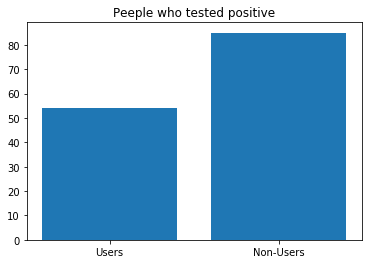

In [61]:
# plot results

import matplotlib.pyplot as plt
%matplotlib inline
q = np.sum(user_and_positive)
r = np.sum(non_user_positive)

plt.bar([0,1],[q,r])
plt.xticks([0,1],["Users","Non-Users"])
plt.title("Peeple who tested positive")
